### Chargement des données et autres importations

----
-----
Il existe de nombreux ensembles de données de LendingClub sur Kaggle. Voici les informations sur cet ensemble de données particulier :

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>Le montant indiqué du prêt demandé par l'emprunteur. Si, à un moment donné, le service de crédit réduit le montant du prêt, cette valeur en tient compte</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>Le nombre de paiements sur le prêt. Les valeurs sont exprimées en mois et peuvent être de 36 ou 60</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Taux d'intérêt du prêt</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>Le paiement mensuel dû par l'emprunteur si le prêt est d'origine</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>Qualité du prêt attribuée par LC</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>sous-niveau de qualité attribuée par LC</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>Le titre de poste fourni par l'emprunteur lors de la demande de prêt.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Durée de l'emploi en années. Les valeurs possibles sont comprises entre 0 et 10, où 0 signifie moins d'un an et 10 signifie dix ans ou plus</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>Le statut de propriétaire du logement fourni par l'emprunteur lors de l'enregistrement ou obtenu à partir du rapport de crédit. Nos valeurs sont : RENT (locataire), OWN (propérétaire), MORTGAGE (hypothèque), OTHER (autre)</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>Le revenu annuel déclaré par l'emprunteur lors de l'enregistrement</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indique si le revenu a été vérifié par la LC, non vérifié, ou si la source de revenu a été vérifiée</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>Le mois au cours duquel le prêt a été financé</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>État actuel du prêt</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>Une catégorie fournie par l'emprunteur pour la demande de prêt</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>Le titre de prêt fourni par l'emprunteur</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>Les 3 premiers chiffres du code postal fourni par l'emprunteur dans la demande de prêt</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>L'état fourni par l'emprunteur dans la demande de prêt</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>Un ratio calculé en utilisant le total des paiements mensuels de l'emprunteur sur le total des dettes, à l'exclusion de l'hypothèque et du prêt LC demandé, divisé par le revenu mensuel autodéclaré de l'emprunteur</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>Le mois d'ouverture de la première ligne de crédit déclarée par l'emprunteur</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>Le nombre de lignes de crédit ouvertes dans le dossier de crédit de l'emprunteur</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Nombre d'enregistrements publics dérogatoires</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Solde total du crédit renouvelable</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Le taux d'utilisation de la ligne renouvelable, ou le montant du crédit utilisé par l'emprunteur par rapport à l'ensemble du crédit renouvelable disponible</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>Le nombre total de lignes de crédit figurant actuellement dans le dossier de crédit de l'emprunteur</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>L'état initial de l'inscription du prêt. Les valeurs possibles sont - W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indique si le prêt est une demande individuelle ou une demande conjointe avec deux co-emprunteurs</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Nombre de comptes hypothécaires</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Nombre de faillites enregistrées dans les registres publics</td>
    </tr>
  </tbody>
</table>

---
----

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [147]:
df.shape

(396030, 27)

In [148]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [149]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

-----
------

# Section 1 : Analyse Exploratoire des Données (EDA)

**OBJECTIF GÉNÉRAL : Comprendre quelles variables sont importantes, consulter les statistiques sommaires et visualiser les données**


----

In [151]:
 df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

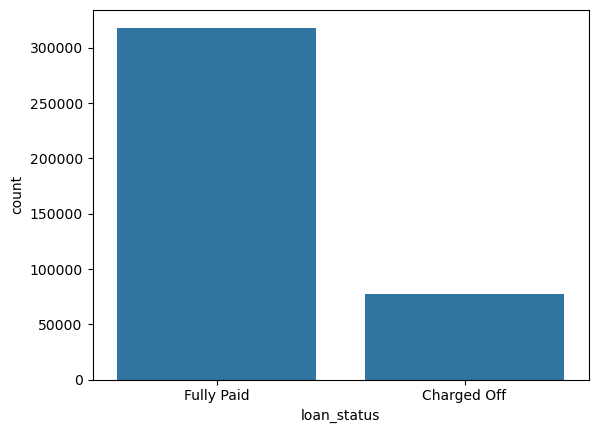

In [152]:
sns.countplot(x = 'loan_status' , data=df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

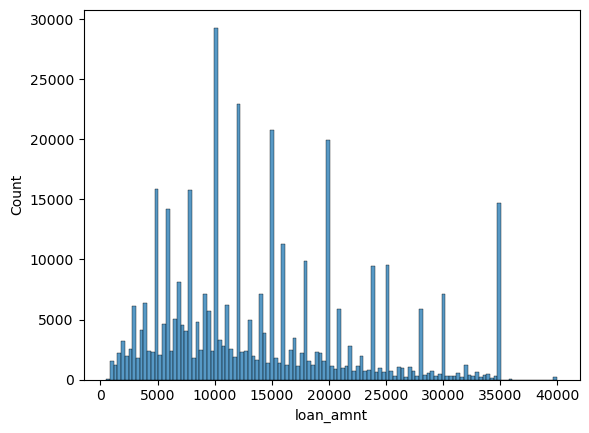

In [153]:
sns.histplot( x = 'loan_amnt' , data=df )

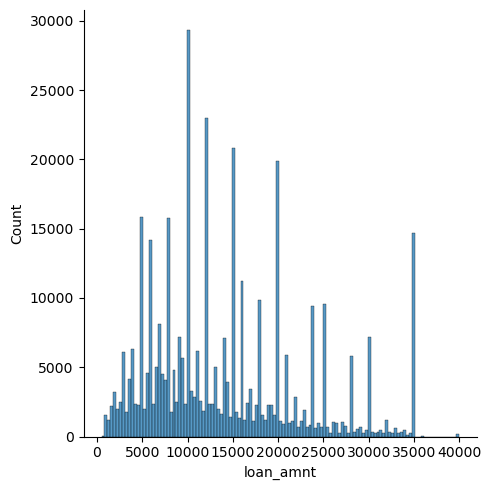

In [154]:
sns.displot( df['loan_amnt'] )

In [155]:
df.select_dtypes(include=[ 'float64' ]).corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

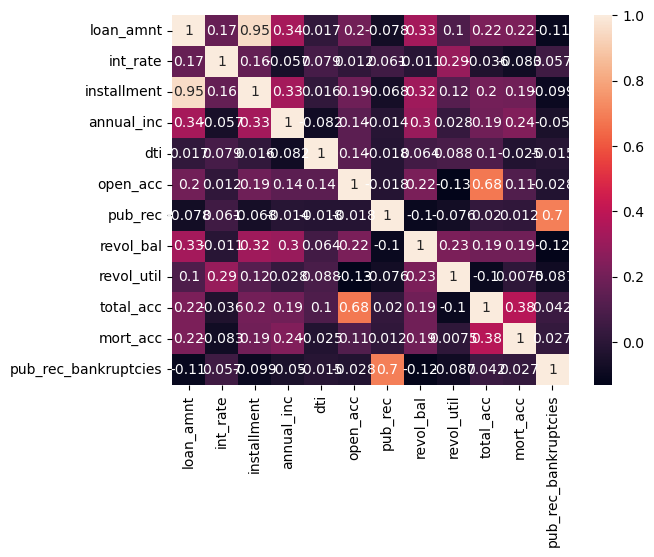

In [156]:
plt.Figure( figsize=(12,10) )
sns.heatmap(df.select_dtypes(include=[ 'float64' ]).corr() , annot=True)


In [157]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<Axes: xlabel='loan_amnt', ylabel='installment'>

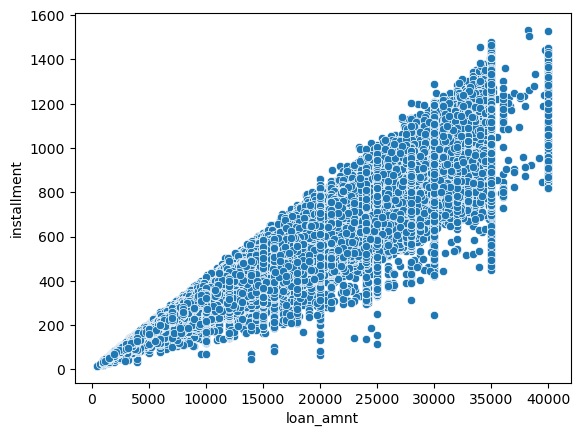

In [158]:
sns.scatterplot( x = 'loan_amnt' , y = 'installment' , data=df )

**Tâche : Créer un diagramme en boîtes (boxplot) montrant la relation entre le statut du prêt (loan_status) et le montant du prêt.**

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

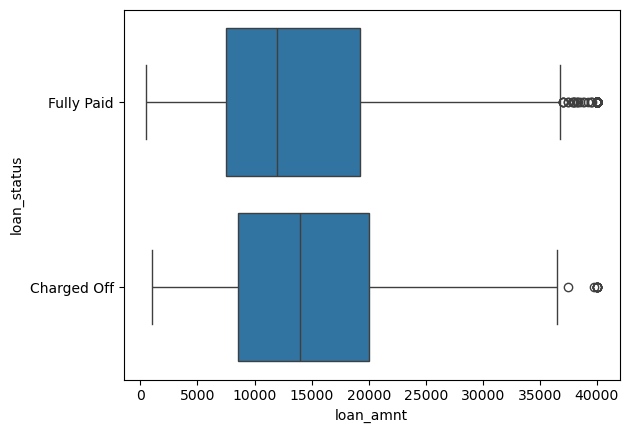

In [159]:
sns.boxplot( x = 'loan_amnt' , y = 'loan_status' , data=df )

** statistiques sommaires pour le montant 
du prêt, regroupées par la feature loan_status.**

In [160]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Tâche : Examinons les colonnes Grade et SubGrade que LendingClub attribue aux prêts. Quels sont les notations et sous-notations uniques possibles ?**

In [161]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [162]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

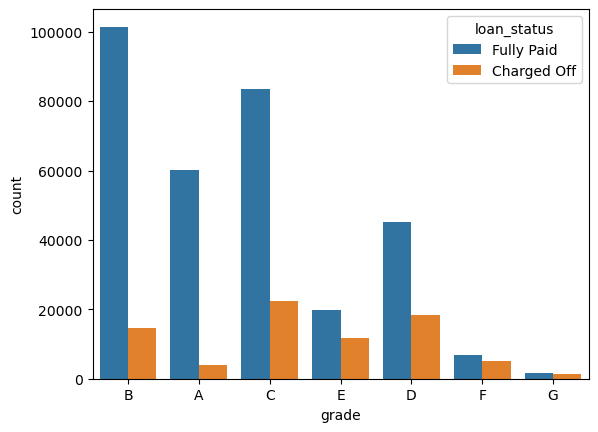

In [163]:
sns.countplot( x = 'grade' , data=df , hue='loan_status' )

## Afficher un graphique de comptage par sous-notation de qualité du prêt (subgrade).

/var/folders/79/y__rh5d90b39_x62d6jvphsm0000gn/T/ipykernel_68712/897147144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'sub_grade' , data=df  , order=ordreDuGraphe , palette='coolwarm') # palette pour changer la couleur


<Axes: xlabel='sub_grade', ylabel='count'>

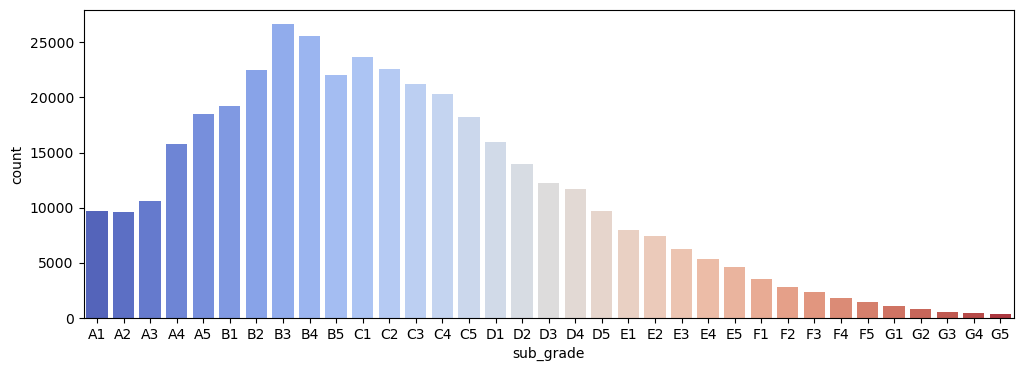

In [164]:
plt.figure( figsize=(12,4) )
ordreDuGraphe = sorted( df['sub_grade'].unique() )
sns.countplot( x = 'sub_grade' , data=df  , order=ordreDuGraphe , palette='coolwarm') # palette pour changer la couleur 

<Axes: xlabel='sub_grade', ylabel='count'>

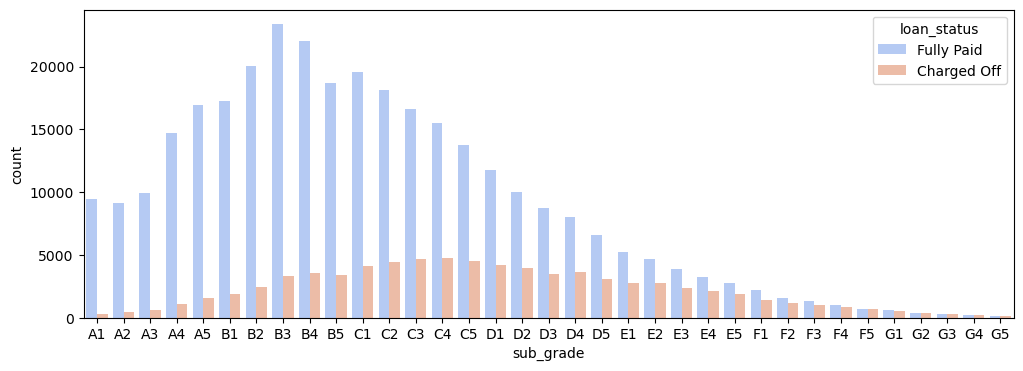

In [165]:
plt.figure( figsize=(12,4) )
ordreDuGraphe = sorted( df['sub_grade'].unique() )
sns.countplot( x = 'sub_grade' , data=df  , order=ordreDuGraphe , palette='coolwarm' , hue='loan_status') # palette pour changer la couleur 

**Tâche : Il semble que les notes F et G ne soient pas remboursées très souvent. le graphique de comptage juste pour leurs sous-niveaux de notation (subgrade).**

<Axes: xlabel='sub_grade', ylabel='count'>

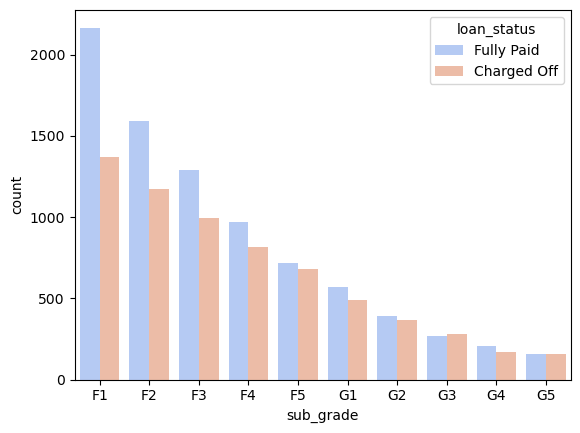

In [166]:
f_et_g = df[ (df['grade'] == 'G') | (df['grade'] == 'F')  ]

ordreDuGraphe = sorted( f_et_g['sub_grade'].unique() )
sns.countplot( x = 'sub_grade' , data=f_et_g  , order=ordreDuGraphe , palette='coolwarm' , hue='loan_status') # palette pour changer la couleur 

In [167]:
f_et_g.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.0,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\r\nNorth Williamtown, U..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.0,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\r\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.0,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\r\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.0,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\r\nJacksonstad, MI 93700"
123,30000.0,60 months,23.83,860.09,F,F5,Victorian Senior Care,10+ years,MORTGAGE,72500.0,...,7.0,0.0,6875.0,94.2,32.0,f,INDIVIDUAL,4.0,0.0,"8219 Dennis Station Apt. 722\r\nBateston, LA 7..."


In [168]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

**Tâche : Créer une nouvelle colonne appelée "load_repaid" qui contiendra 1 si le statut du prêt était "Fully Paid" et un 0 s'il était "Charged Off".**

In [169]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == "Fully Paid" else 0)

In [170]:
df[['loan_repaid' , 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

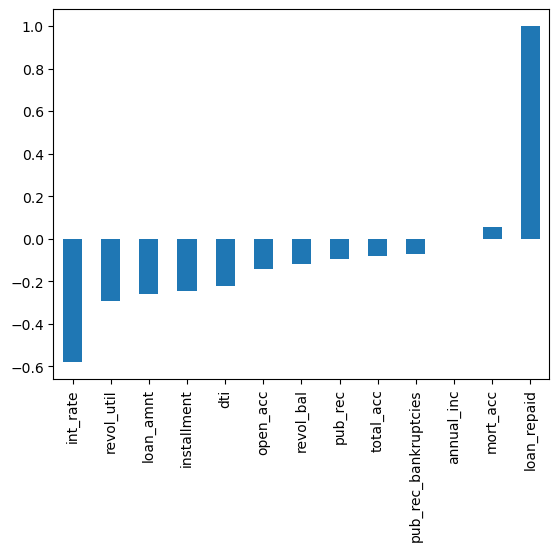

In [171]:
df.corr( numeric_only=True ).corr()['loan_repaid'].sort_values().plot( kind='bar' )

---
---
# Section 2 : Pré-traitement des Données

**Objectifs de la section : Supprimer ou compléter les données manquantes. Supprimer les éléments inutiles ou répétitifs. Convertir les features de type catégorie en variables dummies.**

In [172]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


## Données manquantes

**Explorons ces colonnes de données manquantes. Nous utilisons divers facteurs pour décider de leur utilité ou non, pour voir si nous devons les conserver, les éliminer ou compléter les données manquantes.**

** la taille du DataFrame ?**

In [173]:
df.shape

(396030, 28)

In [174]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [175]:
df.isnull().sum()/ len(df) # pourcentage des valeur manquante

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004434
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

<Axes: >

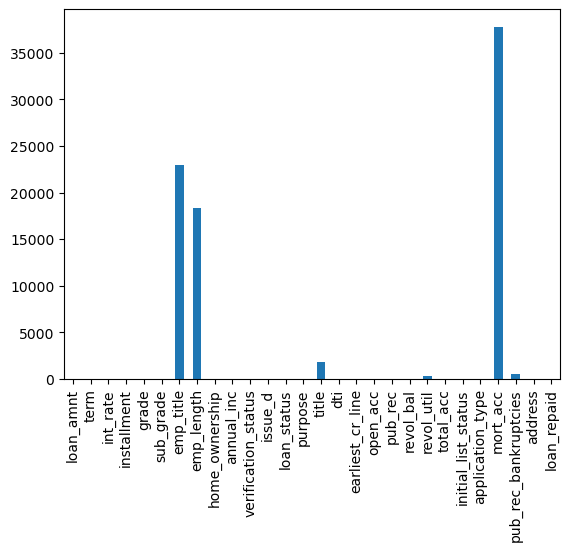

In [176]:
df.isnull().sum().plot( kind='bar' )

**Tâche : Combien y a-t-il de titres d'emploi (emp_title) uniques ?**

In [177]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [178]:
df['emp_title'].nunique() # nombre d'emploie unique 

173105

**Tâche : En réalité, il y a trop de titres de postes uniques pour essayer de les convertir en une feature de variable dummy. Supprimons cette colonne emp_title.**

In [179]:
df = df.drop( 'emp_title' , axis=1 )

In [180]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

<Axes: xlabel='emp_length', ylabel='count'>

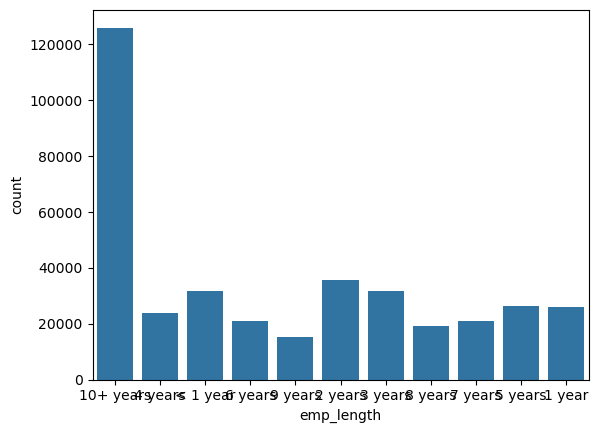

In [181]:
plt.Figure( figsize=(12 , 2) )
sns.countplot(x='emp_length' , data=df )

In [182]:
df['emp_length'].isnull().sum()

18301

In [183]:
sorted(df['emp_length'].dropna().unique()) # pouyr supprimer les valeur manquant 

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [184]:
order = sorted(df['emp_length'].dropna().unique()) # pouyr supprimer les valeur manquant 

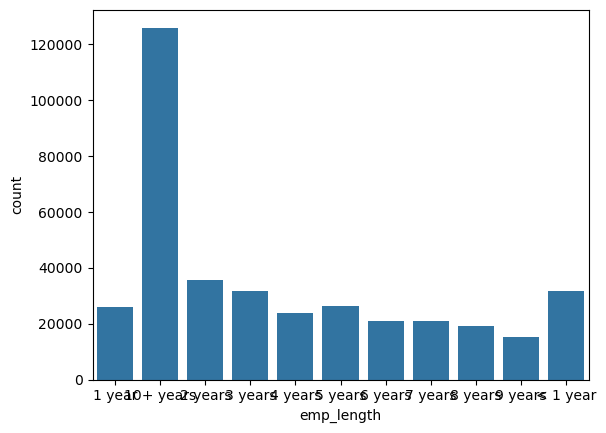

In [185]:
plt.Figure( figsize=(12 , 2) )
sns.countplot(x='emp_length' , data=df , order=order)
plt.show()

In [186]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

<Axes: xlabel='emp_length', ylabel='count'>

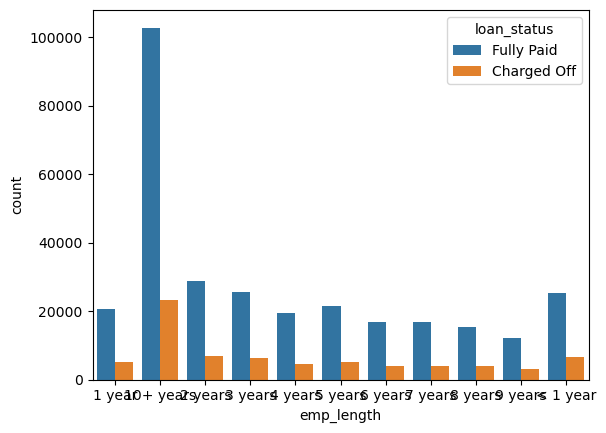

In [187]:
sns.countplot(x='emp_length' , data=df , order=order , hue='loan_status')

**Les taux de Charged Off sont extrêmement similaires pour toutes les durées d'emploi. Continuez et éliminez la colonne emp_length.**

In [188]:
df = df.drop('emp_length',axis=1)

**Tâche : Revoir le DataFrame pour voir quelles sont les colonnes de features pour lesquelles il manque encore des données.**

In [189]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Tâche : Examinez le titre du prêt (colonne title) par rapport à l'objet du prêt (colonne purpose). S'agit-il d'une information répétitive ?**

In [190]:
df['title'].value_counts().head(10)

title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: count, dtype: int64

In [191]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [192]:
df = df.drop('title' , axis=1) # on trouve que title et purpose on presque les meme iformation

In [193]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [194]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [195]:
from sklearn.impute import SimpleImputer

# Pour les colonnes numériques
imputer = SimpleImputer(strategy='mean')

# Appliquer à toutes les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])
df_numeric_imputed = imputer.fit_transform(df_numeric)

# Refaire un DataFrame propre avec les noms de colonnes
import pandas as pd
df_numeric = pd.DataFrame(df_numeric_imputed, columns=df_numeric.columns)

In [196]:
df[df_numeric.columns] = df_numeric

In [197]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [198]:
df = df.dropna()

In [199]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1.0
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1.0
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1.0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1.0
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1.0
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1.0
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1.0
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1.0


In [200]:
df.select_dtypes('object')

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


### Feature term

**Tâche : Convertir la feature term en un type de données numériques avec la 

---

valeur 36 ou 60 en utilisant .apply()**

In [201]:
df['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [202]:
df['term'] = df['term'].apply( lambda x : int(x[:3]) )

In [203]:
df['term'].value_counts()

term
36    302005
60     94025
Name: count, dtype: int64

### Feature grade

**Tâche : Nous savons déjà que la notation (grade) fait partie de sub_grade donc supprimons la feature grade.**

In [204]:
df = df.drop('grade' , axis=1)

In [205]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1.0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1.0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1.0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1.0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.0


**Tâche : On vas  Convertir ces colonnes : ['verification_status', 'application_type', 'initial_list_status', 'purpose'] en variables dummies et concaténez-les avec le DataFrame d'origine.**

In [206]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [207]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']] , drop_first=True)
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose']  , axis=1)

In [208]:
df = pd.concat( ( df , dummies ) , axis=1 )

In [209]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Jan-2015,Fully Paid,26.24,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Jan-2015,Fully Paid,12.79,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Nov-2014,Fully Paid,2.60,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,...,False,False,False,False,False,False,False,False,False,False


### Feature home_ownership

**Tâche : Examiner les valeurs de la colonne home_ownership.**

In [210]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [211]:
df['home_ownership'].replace( [ 'NONE' , 'ANY' ] , 'OTHER' ).value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [215]:
df['home_ownership']  =df['home_ownership'].replace( [ 'NONE' , 'ANY' ] , 'OTHER' )

In [217]:
 df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [218]:
dummies = pd.get_dummies( df['home_ownership'] , drop_first=True )

df = df.drop('home_ownership' , axis=1) 

df = pd.concat((df , dummies) , axis=1 )

### Feature address

**Tâche : Concevons avec du feature engineering une colonne de code postal à partir de l'adresse de l'ensemble de données. Créez une colonne appelée 'zip_code' qui extrait le code postal de la colonne address.**

In [219]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [223]:
df['zip_code'] = df['address'].apply( lambda addresse : addresse[-5:] )

In [224]:
df['zip_code'].value_counts()

zip_code
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [225]:
df.shape

(396030, 41)

In [226]:
dummies = pd.get_dummies( df['zip_code'] , drop_first=True )

df = df.drop('zip_code' , axis=1) 

df = pd.concat((df , dummies) , axis=1 )

In [227]:
df.shape

(396030, 49)

In [228]:
df = df.drop('address' , axis=1)

### Feature issue_d 

**Tâche : Il s'agirait de fuite de données, nous ne saurions pas à l'avance si un prêt sera émis ou non en utilisant notre modèle**

In [229]:
df = df.drop('issue_d',axis=1)

### Feature earliest_cr_line

**Tâche : Il semble s'agir d'une feature de time stamp historique. Vous pouvez extraire l'année de cette feature à l'aide d'une fonction .apply, puis convertissez-la en une feature numérique. Définissez cette nouvelle donnée dans une colonne feature qu'on appelle 'earliest_cr_year', puis supprimez la feature earliest_cr_line**.

In [230]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [231]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'loan_status'], dtype='object')

In [233]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [234]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [235]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,False,False,False,False,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,False,False,False,False,False,False,False,False,False,False


In [236]:
df[['loan_repaid' , 'loan_status' ]]

,loan_repaid,loan_status
0,1.0,Fully Paid
1,1.0,Fully Paid
2,1.0,Fully Paid
3,1.0,Fully Paid
4,0.0,Charged Off
...,...,...
396025,1.0,Fully Paid
396026,1.0,Fully Paid
396027,1.0,Fully Paid
396028,1.0,Fully Paid


In [237]:
df = df.drop('loan_status' , axis=1)

## Répartition Entraînement / Test

In [232]:
from sklearn.model_selection import train_test_split


In [239]:
X = df.drop('loan_repaid' , axis=1).values # Value  pour l'adapter avec tensorflow 
y = df['loan_repaid'].values

----
----

**Partie facultative**

Prendre un échantillon pour le temps d'entraînement

Optionnel : Utilisez .sample() pour prendre un échantillon des 490k+ entrées afin de gagner du temps sur l'entraînement. Hautement recommandé pour les ordinateurs à faible RAM ou si vous n'utilisez pas de GPU.

----
----

In [240]:
# df = df.sample(frac=0.1,random_state=101)


**Tâche : Effectuer une répartition train/test avec test_size=0,2 et un random_state de 101,**

In [241]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=101)